In [1]:
import numpy as np
import os
import glob
from collections import OrderedDict
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
from astropy import table

#For running specutils
import specutils
from specutils.analysis import Splice
from astropy import units as u
from astropy.nddata import StdDevUncertainty

matplotlib.rcParams['image.origin'] = 'lower'

# Read in iraf output

In [2]:
tab_iraf = table.Table.read('/Users/ogaz/specutils/test_data/iraf_splice_weights.fits')
flux_iraf = tab_iraf['FLUX'].data.data
wave_iraf = tab_iraf['WAVELENGTH'].data.data

# Run Specutils

In [5]:
filenames=[ '/Users/ogaz/specutils/test_data/ocr7ncmhq_weights.fits',
           '/Users/ogaz/specutils/test_data/ocr7ncmiq_weights.fits']
spectra_even = []
spectra = []

for filename in filenames:
    tab = table.Table.read(filename)
    met = {'weights':tab['WEIGHT'].data.data.flatten()}
    spectra.append(specutils.Spectrum1D(flux=tab['FLUX'].data.data.flatten(), 
                spectral_axis=tab['WAVELENGTH'].data.data.flatten(),
                uncertainty=StdDevUncertainty(tab['ERROR'].data.data.flatten()),
                meta = met))
    
splicei = Splice(spacing='coarse')
spectra_python=splicei(spectra)

INFO:root:Increasing bin width to 4.879917205259423 Angstrom.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.


# Comparison Plots

In [10]:
flux_diff = (flux_iraf[0][:-2] - spectra_python.flux.value) / np.average(flux_iraf[0][:-2])

In [14]:
print("flux iraf: len - {}\n{}\n".format(len(flux_iraf[0][:-2]), flux_iraf[0][:-2]))
print("wave iraf: len - {}\n{}\n".format(len(wave_iraf[0][:-2]), wave_iraf[0][:-2]))
print("flux python: len - {}\n{}\n".format(len(spectra_python.flux), spectra_python.flux))
print("wave python: len - {}\n{}\n".format(len(spectra_python.spectral_axis), spectra_python.spectral_axis))

flux iraf: len - 1023
[2.4425474e-11 1.7860585e-11 1.9450212e-11 ... 1.0210561e-11 9.3829449e-12
 9.1754764e-12]

wave iraf: len - 1023
[ 5269.42588739  5274.30580459  5279.1857218  ... 10246.94143675
 10251.82135396 10256.70127116]

flux python: len - 1023
[2.42145778e-11 1.79578278e-11 1.93108144e-11 ... 1.03282139e-11
 9.43400650e-12 8.98221514e-12] 1 / Angstrom2

wave python: len - 1023
[ 5269.42588739  5274.30580459  5279.1857218  ... 10246.94143675
 10251.82135396 10256.70127116] Angstrom



<IPython.core.display.Javascript object>


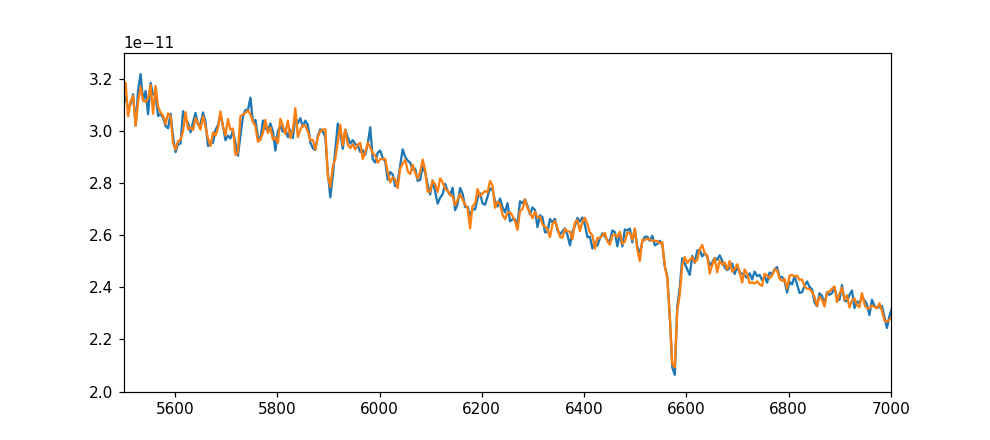

In [19]:
fig, axes = plt.subplots()
fig.set_size_inches(9, 4)
-
axes.plot(wave_iraf[0],flux_iraf[0])
axes.plot(spectra_python.spectral_axis, spectra_python.flux)

Avg:0.00040215134657455156 Min:-0.04821822204049109, Max:0.044940999376349884


<IPython.core.display.Javascript object>


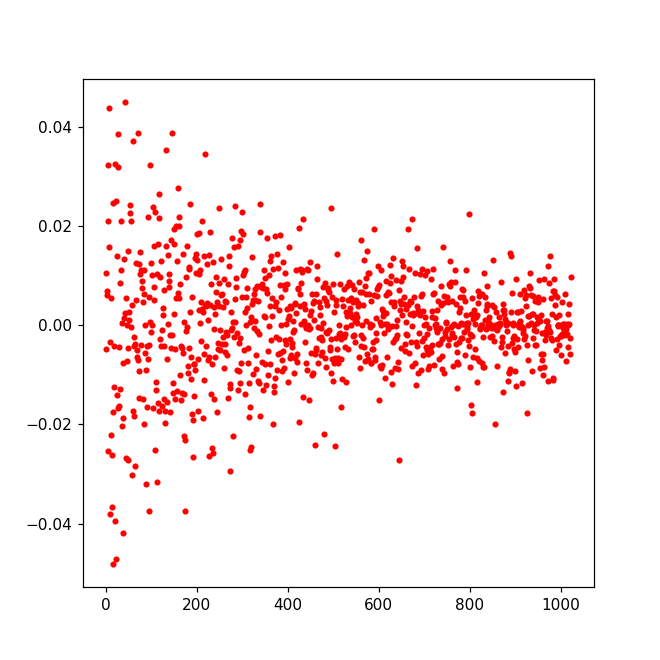

In [15]:
print("Avg:{} Min:{}, Max:{}".format(np.average(flux_diff), min(flux_diff), max(flux_diff)))

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.plot(flux_diff.flatten(), 'r.')

plt.show()